# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
# Data Import: Import the dataset into a statistical software tool such as Python or R
import pandas as pd
data=pd.read_csv('Wholesale_Data.csv')
df=pd.DataFrame(data)

In [7]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors. Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

In [8]:
df.shape

(440, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<b>No missing values in the dataset</b>

In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<b> Can't see any noticable fluctuaction in the dataset. </b>

Channel and Region are categorical, so it's better to switch to the correct data type.

In [11]:
df[['Channel','Region']] = df[['Channel','Region']].astype('category')

In [12]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


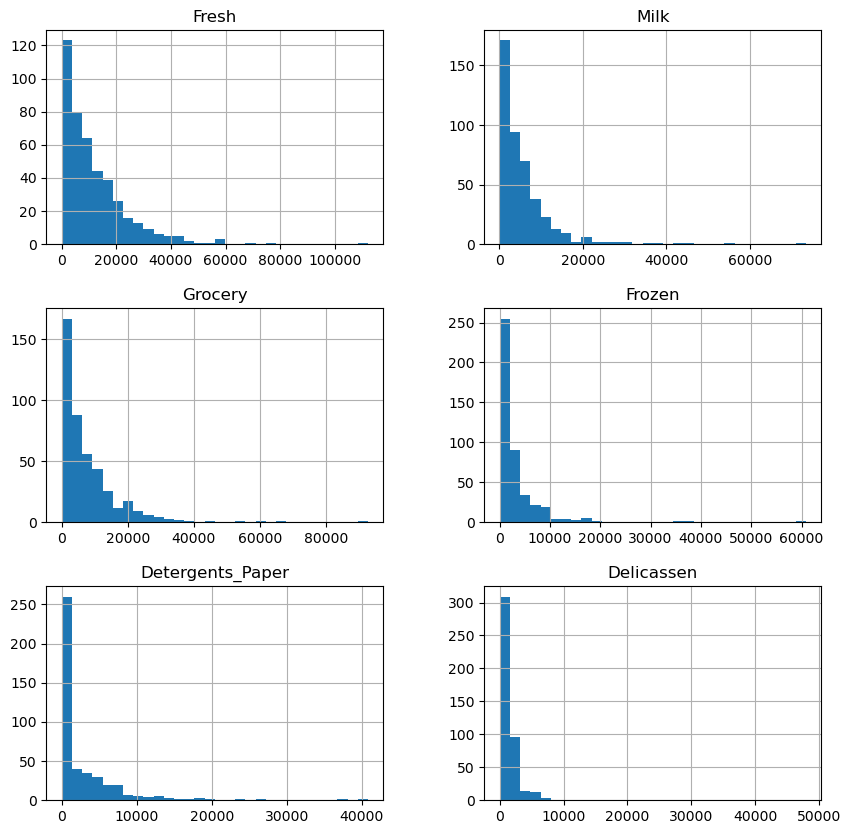

In [15]:
# plotting distributions for numerical columns only

numerical_columns=df.select_dtypes(include=['number'])
import matplotlib.pyplot as plt
numerical_columns.hist(bins=30, figsize=(10,10))
plt.show()

All variables shows positively skewed distribution with high values at the beginning and smaller values to the right.<br>
The data is not normally distributed and probably data transformation will be needed to make the data more symmetric and close to a normal distribution.<br><br>
Also practically all plots (except Delicassen) show outliers which could have an impact to correct prediction.Let's check it also with box-plots.

<Axes: >

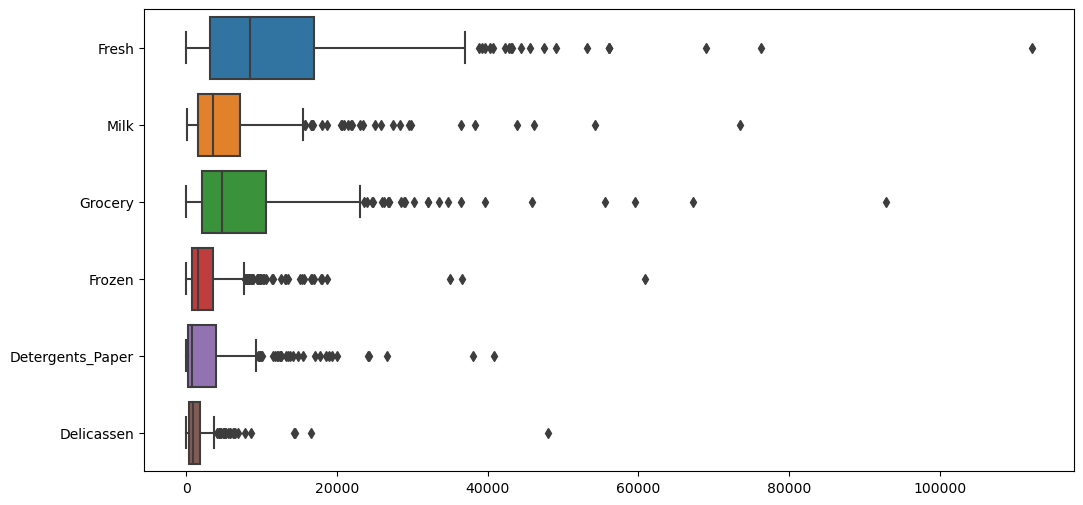

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_columns,orient='h')

These outliers don't seem to be errors.So, considering data transformation seems a good choice. 

---

Let's visualize correlations between predictive variable pairs

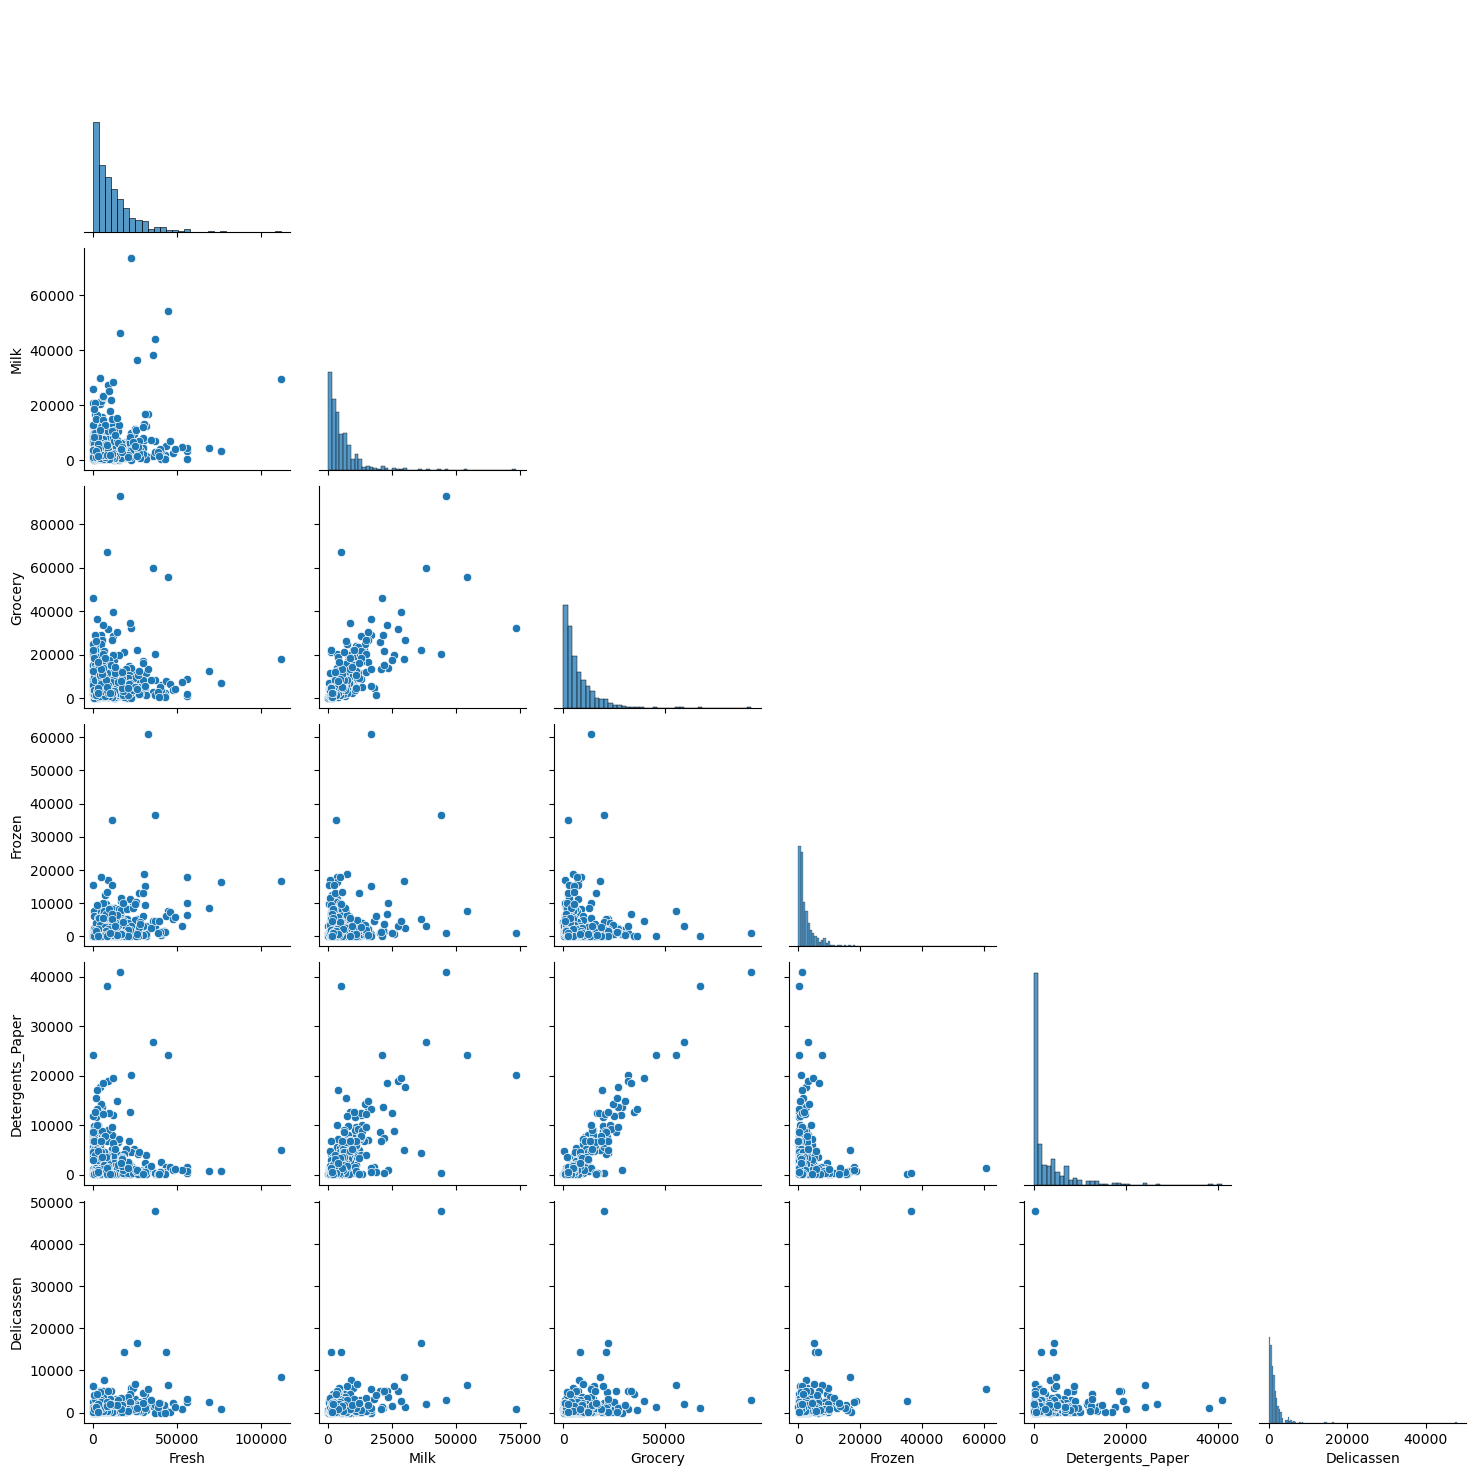

In [18]:
# Create a pairwise scatter plot using Seaborn's pairplot
sns.pairplot(df,corner=True)
plt.show()

Clearly visible linear correlation can be detected between Grocery and Detergents_Paper, and Milk and Grocery (less visible) Increasing spending on groceries leads to increased spending on detergents/milks. 
Despite of correlation between the pairs above I would prefer to keep them both.Probably I will check the model performace after, by removing one of this features.  

Let's check correlations using correlation matrix

In [19]:
correlation_matrix = df.corr() # calculating correlation matrix

print(correlation_matrix)

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


C:\Users\gareg\AppData\Local\Temp\ipykernel_14872\1832625046.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr() # calculating correlation matrix


The results just reconfirm that "Grocery" and "Detergents_Paper" (coef =0.925) and "Grocery" and "Milk" (coef = 0.73) have a strong positive correlation. It's worth to mention that "Fresh" and "Frozen" practically not correlated with "Grocery" (coef~0) ?! <br>
Let's visualize the correlation matrix below


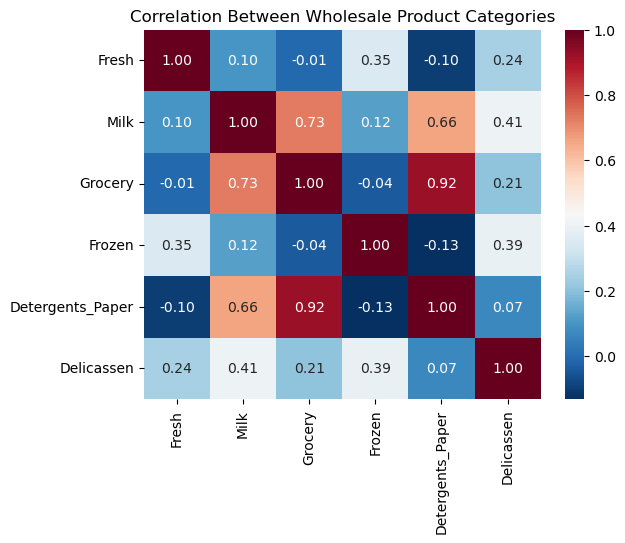

In [20]:
# ploting correlation heatmap

# Choose a Diverging color palette
colors = sns.color_palette("RdBu_r", as_cmap=True)

sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap=colors)

plt.title('Correlation Between Wholesale Product Categories')

plt.show()

<b> Data Transformation </b>

As all variables shows positively skewed distribution with high values at the beginning and smaller values to the right I will apply data transformation to make it close to a normal distribution.<br>

Let's check 2 data tranformation techniques(Log and square root) and try to choose the best one.

In [24]:
import numpy as np
from scipy import stats

# Create a copy of the original DataFrame
df_log_transformed = df.copy()
df_sqrt_transformed = df.copy ()

# Apply Transformations to all numeric columns
df_log_transformed[numerical_columns.columns] = np.log1p(numerical_columns)
df_sqrt_transformed[numerical_columns.columns] = np.sqrt(numerical_columns)

print(df_log_transformed.head())
print(df_sqrt_transformed.head())

  Channel Region      Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0       2      3   9.446992  9.175438  8.930891  5.370638          7.891705   
1       2      3   8.861917  9.191259  9.166284  7.474772          8.099858   
2       2      3   8.756840  9.083529  8.947026  7.785721          8.165364   
3       1      3   9.492960  7.087574  8.348064  8.764834          6.230481   
4       2      3  10.026413  8.596189  8.881697  8.272826          7.483244   

   Delicassen  
0    7.199678  
1    7.482682  
2    8.967632  
3    7.489412  
4    8.553718  
  Channel Region       Fresh       Milk    Grocery     Frozen  \
0       2      3  112.556652  98.264948  86.954011  14.628739   
1       2      3   84.005952  99.045444  97.816154  41.976184   
2       2      3   79.705709  93.850946  87.658428  49.040799   
3       1      3  115.173782  34.583233  64.969223  80.024996   
4       2      3  150.382845  73.552702  84.841028  62.569961   

   Detergents_Paper  Delicassen  
0   

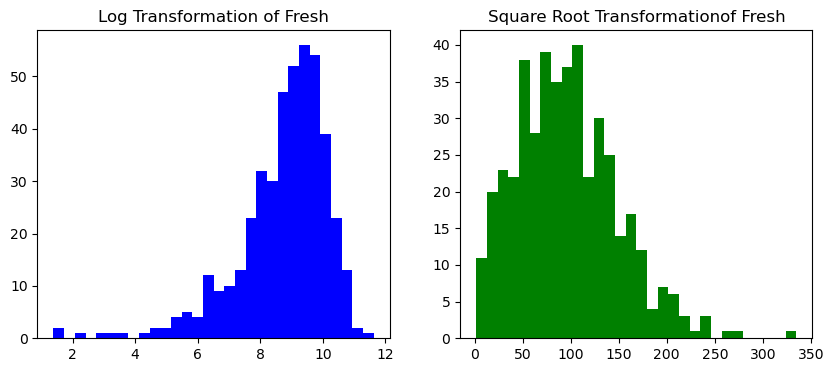

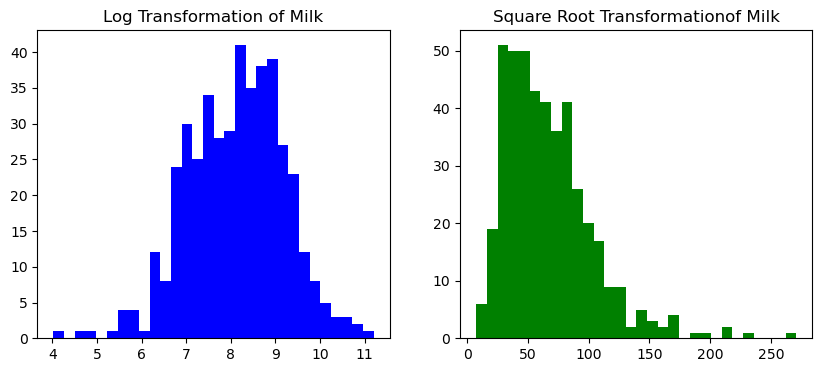

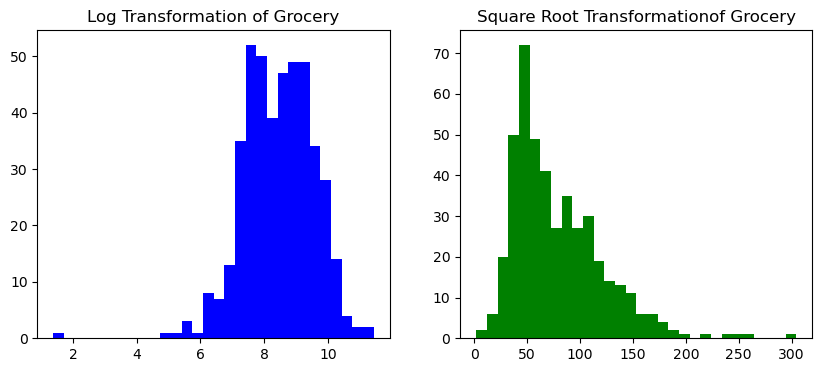

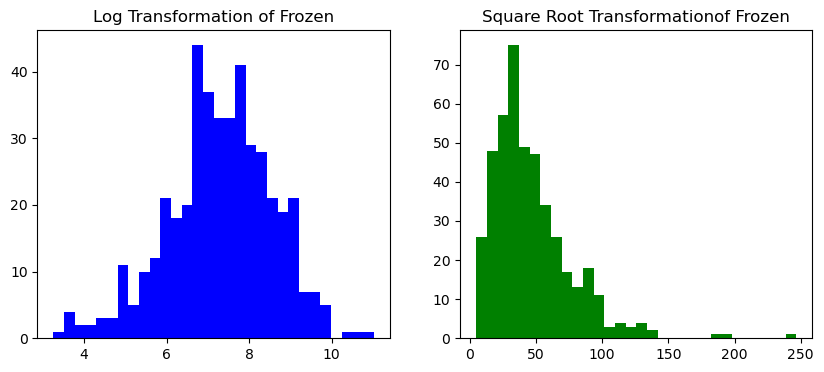

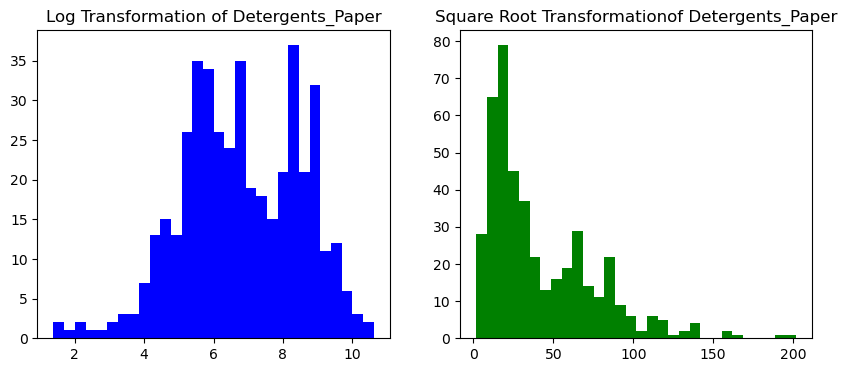

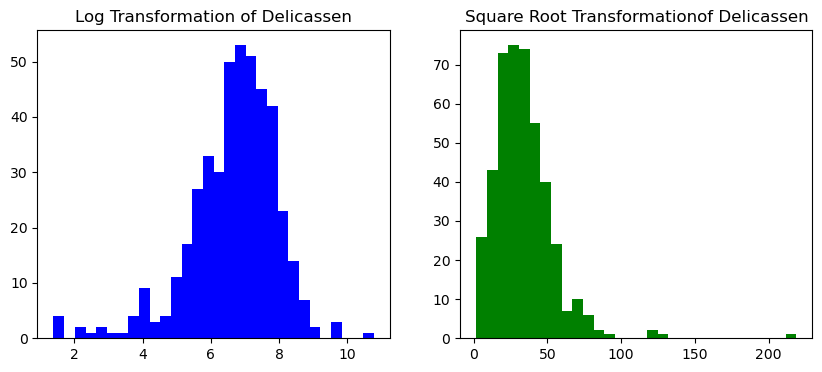

In [28]:
from scipy import stats

# Create an empty DataFrame to store the results with p-values for 2 different transformations
results_df = pd.DataFrame(columns=['Feature', 'Log Transformation P-Value', 'Square Root Transformation P-Value'])



for column in numerical_columns.columns:
    fig, axs = plt.subplots(1, 2, figsize=(10,4))
    
    # Plot the histogram for the 'Fresh' column in df_log_transformed
    axs[0].hist(df_log_transformed[column], bins=30, color='blue')
    axs[0].set_title(f'Log Transformation of {column}')
    shapiro_log, p_log = stats.shapiro(df_log_transformed[column])
    
    # Plot the histogram for the 'Fresh' column in df_sqrt_transformed
    axs[1].hist(df_sqrt_transformed[column], bins=30, color='green')
    axs[1].set_title(f'Square Root Transformationof {column}')

    # Perform Shapiro-Wilk test for Log Transformation
    _, p_log = stats.shapiro(df_log_transformed[column])
    
    # Perform Shapiro-Wilk test for Square Root Transformation
    _, p_sqrt = stats.shapiro(df_sqrt_transformed[column])
    
    # Add the results to the DataFrame
    #results_df = results_df.append({'Feature': column, 'Log Transformation P-Value': p_log, 'Square Root Transformation P-Value': p_sqrt}, ignore_index=True)
    
    # Display the plots
    plt.show()

Well,  not a perfection but logaritmic tranformation looks better. Let's check Shapiro-Wilk results for p-values stored in results_df

In [82]:
results_df

,Feature,Log Transformation P-Value,Square Root Transformation P-Value
0,Fresh,7.100682e-17,2.065324e-07
1,Milk,9.036940e-02,1.339937e-16
2,Grocery,3.544835e-08,2.359940e-15
3,Frozen,5.463341e-03,1.210508e-18
4,Detergents_Paper,3.624418e-05,2.078623e-19
5,Delicassen,9.039550e-13,1.674262e-20


# Part II - KMeans Clustering

#### Determining the optimal number of clusters for K-means clustering

In [61]:
from sklearn.cluster import KMeans
    
# Calculate sum of squared distances (SSD) for different values of K
# want to compare also how raw data and transformed data will behave in terms of optimal number of clusters.
# want to check also how Silhouette Score for raw data and transformed one will behave

ssd = []
ssd_log=[]
silhouette_scores = []
silhouette_scores_log = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    kmeans_log = KMeans(n_clusters=k, random_state=0).fit(df_log_transformed)
    labels = kmeans.labels_
    score = silhouette_score(data, labels)
    score_log=silhouette_score(df_log_transformed, labels)
    
    silhouette_scores.append(score)
    silhouette_scores_log.append(score_log)
    
    ssd.append(kmeans.inertia_) 
    ssd_log.append(kmeans_log.inertia_)
    print(ssd,ssd_log,silhouette_scores,silhouette_scores_log)


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837] [3565.625005589482] [0.5115333882980367] [0.0868327220655216]


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837, 80342167254.53632] [3565.625005589482, 3080.3728653325297] [0.5115333882980367, 0.4764089086483815] [0.0868327220655216, 0.05804757811217289]


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837, 80342167254.53632, 64855545845.90141] [3565.625005589482, 3080.3728653325297, 2747.0874704297767] [0.5115333882980367, 0.4764089086483815, 0.3866313675434283] [0.0868327220655216, 0.05804757811217289, 0.09883225800356382]


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837, 80342167254.53632, 64855545845.90141, 53019062919.00003] [3565.625005589482, 3080.3728653325297, 2747.0874704297767, 2553.821984809998] [0.5115333882980367, 0.4764089086483815, 0.3866313675434283, 0.3726792636677015] [0.0868327220655216, 0.05804757811217289, 0.09883225800356382, 0.043988309681998995]


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837, 80342167254.53632, 64855545845.90141, 53019062919.00003, 47268536808.12695] [3565.625005589482, 3080.3728653325297, 2747.0874704297767, 2553.821984809998, 2361.45568237446] [0.5115333882980367, 0.4764089086483815, 0.3866313675434283, 0.3726792636677015, 0.3189453870324389] [0.0868327220655216, 0.05804757811217289, 0.09883225800356382, 0.043988309681998995, 0.021871642352998377]


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837, 80342167254.53632, 64855545845.90141, 53019062919.00003, 47268536808.12695, 41548901942.8243] [3565.625005589482, 3080.3728653325297, 2747.0874704297767, 2553.821984809998, 2361.45568237446, 2227.3710078351783] [0.5115333882980367, 0.4764089086483815, 0.3866313675434283, 0.3726792636677015, 0.3189453870324389, 0.3420597330836567] [0.0868327220655216, 0.05804757811217289, 0.09883225800356382, 0.043988309681998995, 0.021871642352998377, 0.04177257777896484]


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837, 80342167254.53632, 64855545845.90141, 53019062919.00003, 47268536808.12695, 41548901942.8243, 36471327786.22139] [3565.625005589482, 3080.3728653325297, 2747.0874704297767, 2553.821984809998, 2361.45568237446, 2227.3710078351783, 2100.060197583358] [0.5115333882980367, 0.4764089086483815, 0.3866313675434283, 0.3726792636677015, 0.3189453870324389, 0.3420597330836567, 0.32441562635555593] [0.0868327220655216, 0.05804757811217289, 0.09883225800356382, 0.043988309681998995, 0.021871642352998377, 0.04177257777896484, 0.027760075266440743]


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837, 80342167254.53632, 64855545845.90141, 53019062919.00003, 47268536808.12695, 41548901942.8243, 36471327786.22139, 32765817747.318153] [3565.625005589482, 3080.3728653325297, 2747.0874704297767, 2553.821984809998, 2361.45568237446, 2227.3710078351783, 2100.060197583358, 2027.3094753079317] [0.5115333882980367, 0.4764089086483815, 0.3866313675434283, 0.3726792636677015, 0.3189453870324389, 0.3420597330836567, 0.32441562635555593, 0.31238578702892794] [0.0868327220655216, 0.05804757811217289, 0.09883225800356382, 0.043988309681998995, 0.021871642352998377, 0.04177257777896484, 0.027760075266440743, 0.013428685372201807]


C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[113217528878.79837, 80342167254.53632, 64855545845.90141, 53019062919.00003, 47268536808.12695, 41548901942.8243, 36471327786.22139, 32765817747.318153, 29734145365.288002] [3565.625005589482, 3080.3728653325297, 2747.0874704297767, 2553.821984809998, 2361.45568237446, 2227.3710078351783, 2100.060197583358, 2027.3094753079317, 1942.7589732475105] [0.5115333882980367, 0.4764089086483815, 0.3866313675434283, 0.3726792636677015, 0.3189453870324389, 0.3420597330836567, 0.32441562635555593, 0.31238578702892794, 0.3000912404852967] [0.0868327220655216, 0.05804757811217289, 0.09883225800356382, 0.043988309681998995, 0.021871642352998377, 0.04177257777896484, 0.027760075266440743, 0.013428685372201807, 0.007928428467727762]


#### Checking/ matching options for determining the optimal number of clusters <br>(SSD and Silhouette score approaches / raw and transformed data)

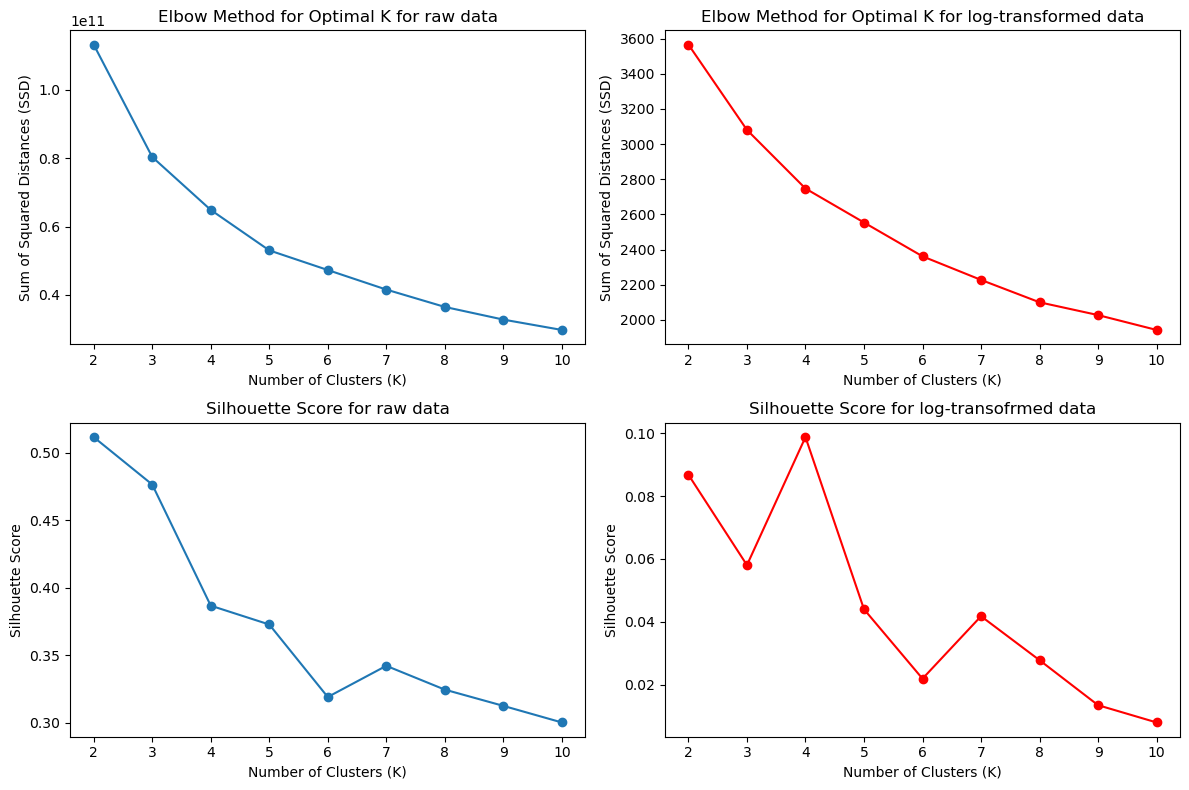

In [78]:

fig, axs = plt.subplots(2, 2, figsize=(12,8))
# Plot SSD vs. K

axs[0,0].plot(K_range, ssd, marker='o')
axs[0,0].set_title(f'Elbow Method for Optimal K for raw data')
axs[0,0].set_xlabel('Number of Clusters (K)')
axs[0,0].set_ylabel('Sum of Squared Distances (SSD)')

# Plot SSD_log vs. K
axs[0,1].plot(K_range, ssd_log, marker='o',color='red')
axs[0,1].set_title(f'Elbow Method for Optimal K for log-transformed data')
axs[0,1].set_xlabel('Number of Clusters (K)')
axs[0,1].set_ylabel('Sum of Squared Distances (SSD)')

axs[1,0].plot(K_range, silhouette_scores, marker='o')
axs[1,0].set_title(f'Silhouette Score for raw data')
axs[1,0].set_xlabel('Number of Clusters (K)')
axs[1,0].set_ylabel('Silhouette Score')

axs[1,1].plot(K_range, silhouette_scores_log, marker='o', color='red')
axs[1,1].set_title(f'Silhouette Score for log-transofrmed data')
axs[1,1].set_xlabel('Number of Clusters (K)')
axs[1,1].set_ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


<b>While for raw data, the Silhouette score presents doubtful information as it is sensitive to noise, for log-transformed data, it clearly indicates 4 as a strong choice for clusters. This result is also consistent with the elbow method, where 4, 5, and 6 are practically in one line</b>

Performing K-means clustering 

In [103]:
# Initialize K-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Perform K-means clustering
kmeans.fit(df_log_transformed)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add the cluster assignments to df_log_transformed
df_log_transformed['Cluster'] = cluster_assignments

# print results
df_log_transformed

C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gareg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,1
1,2,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,1
2,2,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,0
3,1,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,3
4,2,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,0
...,...,...,...,...,...,...,...,...,...
435,1,3,10.299037,9.396986,9.682092,9.483112,5.209486,7.698483,3
436,1,3,10.577172,7.266827,6.639876,8.414274,4.543295,7.760893,3
437,2,3,9.584108,9.647885,10.317053,6.082219,9.605216,7.532624,1
438,1,3,9.239025,7.591862,7.711101,6.946014,5.129899,7.661998,2


Let's add a new column with sum of 6 numeric features and then plot them to look at possibilities of segmentation by customer's spend

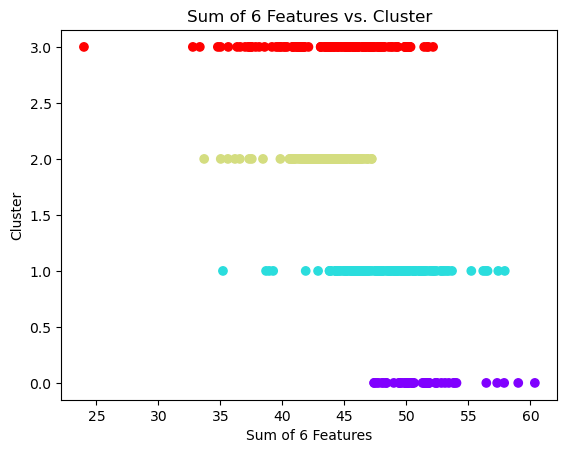

Cluster
0    2720.875055
1    6527.437997
2    5280.892637
3    5738.354576
Name: Summed, dtype: float64


In [106]:
# Create a copy of df_log_transformed to work with
df_log_transformed_summed = df_log_transformed.copy()

# Add a column for the sum of the 6 numeric features
df_log_transformed_summed['Summed'] = df_log_transformed[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

# Scatter plot of Summed vs. Cluster
plt.scatter(df_log_transformed_summed['Summed'], df_log_transformed_summed['Cluster'], c=df_log_transformed_summed['Cluster'], cmap='rainbow')
plt.xlabel('Sum of 6 Features')
plt.ylabel('Cluster')
plt.title('Sum of 6 Features vs. Cluster')
plt.show()

# Group by 'Cluster' and calculate the sum of 'Summed' for each cluster
cluster_totals = df_log_transformed_summed.groupby('Cluster')['Summed'].sum()

# Display the total for each cluster
print(cluster_totals)


Cluster #0 has the lowest spending (2720 vs 5280, 5738,and 6527).
These customers tend to purchase products in smaller quantities or may not purchase from all categories. Marketing and inventory strategies to be reviewed to involve those budget-conscious customers.<br>

Cluster #3 customers have above average spending. We have to keep them by identifieng their preferencies and make them more loyal (offer incentives and VIP service for example)

<b> let's check also spending by region and channel </b>

In [107]:
# Group by 'region' and calculate the sum of 'Summed' for each region
region_totals = df_log_transformed_summed.groupby('Region')['Summed'].sum()
channel_totals = df_log_transformed_summed.groupby('Channel')['Summed'].sum()
# Display the total for each cluster
print(region_totals,channel_totals)

Region
1     3548.311167
2     2175.525690
3    14543.723409
Name: Summed, dtype: float64 Channel
1    13272.573287
2     6994.986979
Name: Summed, dtype: float64


As in region # 3 we have more spendings let's check how our clastering works with filtered region

In [108]:
# Filter by Region 3 and group by 'Cluster' and calculate the sum of 'Summed' for each cluster
cluster_totals_region3 = df_log_transformed_summed[df_log_transformed_summed['Region'] == 3].groupby('Cluster')['Summed'].sum()

# Display the total for each cluster
print(cluster_totals_region3)

Cluster
0    2115.725734
1    4712.646158
2    3842.465856
3    3872.885661
Name: Summed, dtype: float64


the proportion is still approximately the same, so we can say that the strategy could be applied to all regions: the strategy is not region-specific.

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

---

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

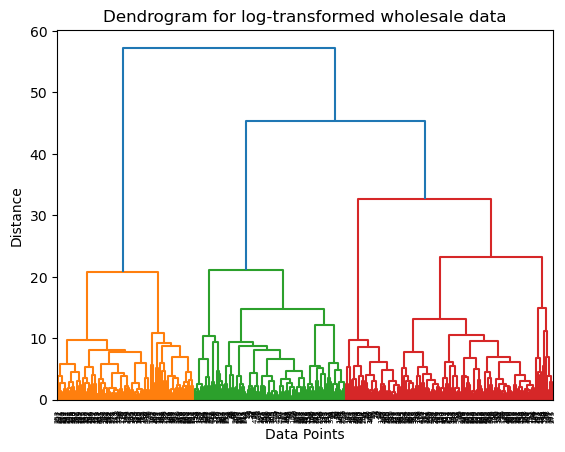

In [95]:
import scipy.cluster.hierarchy as sch

# Compute the linkage matrix
linkage_matrix = sch.linkage(df_log_transformed, method='ward')

# Dendrogram plot
dendrogram = sch.dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram for log-transformed wholesale data')
plt.show()


<b>We can observe that hierarchical clustering and k-means clustering partially complement each other. In both cases, 4 clusters appear to be a better choice</b>

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_log_transformed)

# Perform PCA
pca = PCA()
pca.fit(standardized_data)

PCA()

In [30]:
import pandas as pd

component_loadings = pca.components_

# Create a DataFrame from the component loadings
component_loadings_df = pd.DataFrame(component_loadings, columns=df_log_transformed.columns)

# Display the DataFrame
component_loadings_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.463280,-0.027587,0.111043,-0.468107,-0.504647,0.147608,-0.501381,-0.159113
1,0.076230,0.071411,-0.568496,-0.182580,-0.048082,-0.574547,0.023145,-0.547370
2,-0.030827,-0.979801,-0.165011,-0.010507,0.051675,0.076583,0.039049,-0.040509
3,-0.180304,0.057542,-0.608379,0.002896,-0.073709,-0.120006,-0.169531,0.738560
4,0.002562,0.165329,-0.515221,0.065429,0.075704,0.781188,0.058820,-0.288929
5,0.743476,-0.024218,-0.012724,-0.552221,-0.283489,0.131059,0.091057,0.188980
6,0.416027,-0.052802,-0.030448,0.596978,-0.326976,-0.018511,-0.592329,-0.093349
7,-0.142336,-0.010512,-0.024219,0.286025,-0.736143,-0.008183,0.595996,0.007008


In [99]:
pca.explained_variance_ratio_

array([0.40745378, 0.20584351, 0.12626463, 0.08164153, 0.07437532,
       0.04982228, 0.03227656, 0.02232238])

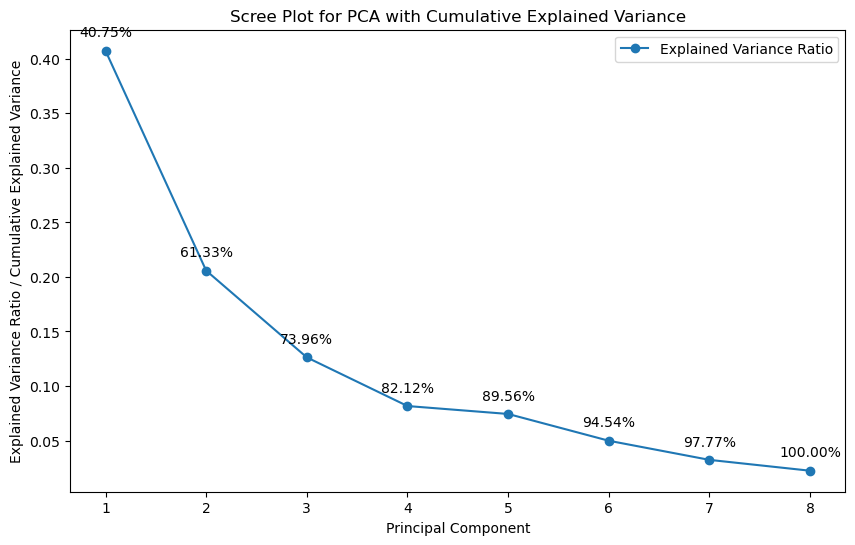

In [102]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a scree plot with percentiles
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance Ratio')

# Annotate percentiles on markers
for i, (x, y) in enumerate(zip(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)):
    plt.annotate(f'{cumulative_variance[i] * 100:.2f}%', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.title('Scree Plot for PCA with Cumulative Explained Variance')
plt.legend()
plt.show()



I would prefer to retain as much information as possible and work with slightly fewer dimensions by choosing a higher number of principal components (around 95% of the variance). I believe the dataset and the number of features allow me not to sacrifice much of the information.So will keep 6 PCs.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* No missing values or noticable fluctuaction in the dataset. All variables shows positively skewed distribution with high values at the beginning and smaller values to the right. Data transformation used to make the data close to a normal distribution.

* In spite of visible outliers don't seems error to me, so kept them all.

* Clearly visible correlations detected between Grocery and Detergents_Paper, and Milk and Grocery. It was conformed by correlation matrix showing strong positive correlations.

* Logaritmic transformation have been chosen as it showed better results compared with square root transformation.

* Hierarchical clustering and k-means clustering partially complement each other. In both cases, 4 clusters was a better choice.

* New aggregation column was added to the dataset to sum of 6 numeric features and then check customer's spend by clusters.

    Cluster #0 represents budget-conscious customers. Marketing strategy to be reviewed to involve those customers.

    Cluster #3 represent VIP customers. Marketing strategy to be reviewed to identify their preferencies and make them even more loyal by additional offers.

    Note: These marketing strategies are not channel or region specific.


* Dataset and the number of features allow not to sacrifice much of the information.95% of variance was choosed as a treshold and 6 PCs were kept.

* It was difficult to find any bussiness insight from PCA for unsupervised learning model as it's main role (as I understand) is in reducing the dementionality but in provided dataset it's not a big concern.